<center><h1><b>Coffee Shop Sales</b></h1></center>

---

*Analyzed by: Dendi Apriyandi*


Dataset:
https://www.kaggle.com/datasets/divu2001/coffee-shop-sales-analysis

# Data Preparation

# Identification of Problems

## Problem Topics

Performing EDA (Exploratory Data Analysis) to Identify Relationships Between Columns and Visualizing the Data for Easier Analysis

# Data Overview

| **Column**            | **Description** |
|-----------------------|-----------------|
| **transaction_id**    | A unique identifier for each transaction. |
| **transaction_date**  | The date of the transaction in the format (DD-MM-YYYY). |
| **transaction_time**  | The time of the transaction in the format (HH:MM:SS). |
| **store_id**          | A unique identifier for the store where the transaction occurred. |
| **store_location**    | The physical location or region where the store is located. |
| **product_id**        | A unique identifier for each product involved in the transaction. |
| **transaction_qty**   | The number of products purchased in the transaction. |
| **unit_price**        | The price per unit of the product. |
| **Total_Bill**        | The total bill amount (transaction_qty × unit_price). |
| **product_category**  | The category of the product, such as "Electronics," "Clothing," or "Food." |
| **product_type**      | A subcategory or type within the product category. |
| **product_detail**    | Additional details or description of the specific product. |
| **Size**              | The size of the product (e.g., S, M, L, or specific size information). |
| **Month Name**        | The name of the month when the transaction took place (e.g., January, February). |
| **Day Name**          | The name of the day when the transaction occurred (e.g., Monday, Tuesday). |
| **Hour**              | The hour of the transaction in 24-hour format. |
| **Month**             | The numeric month (1 for January, 2 for February, etc.). |
| **Day of Week**       | A numeric representation of the day of the week (0 for Sunday, 1 for Monday, etc.). |


# Data Loading

This section is for data preparation before more and deeper
 data exploration

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# For Google Colab integration (if working in Google Colab)
from google.colab import drive  # To access Google Drive in Colab

## Load Dataset

### From Google Drive

In [ ]:
# Force remount to refresh authentication
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Read the dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Project (Portofolio)/Coffee Shop Sales/coffee-shop-sales.csv')  # Read the file after mounting

# Adjust Pandas settings to display all columns in the output
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the DataFrame:
df.head()  # Show the first 5 rows to get an overview of the data

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


### From Local

In [ ]:
# # Adjust Pandas settings to display all columns in the output
# pd.set_option('display.max_columns', None)

# # Read DataFrame from CSV file:
# df = pd.read_csv('hr-analytics-employee-attrition-and-Performance.csv')  # Load data from 'hr-analytics-employee-attrition-and-Performance.csv' into a DataFrame

🔹`coffee-shop-sales.csv` dataset already loaded

### Create Copy of Dataset for Data Overview

In [ ]:
# Create a copy of the DataFrame to avoid modifying the original data
df_view = df.copy()

# Display the first 5 rows of the DataFrame:
df_view.head()  # Show the first 5 rows to get an overview of the data

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


## Column Handling

In [ ]:
# Function to convert column names to lowercase and replace spaces with underscores
def clean_column_names(df_view):
    new_columns = []
    for col in df_view.columns:
        new_col = col.lower().replace(' ', '_')
        new_columns.append(new_col)
    df_view.columns = new_columns
    return df_view

# Example usage:
df_view = clean_column_names(df_view)  # Assuming 'df_view' is your DataFrame
df_view.columns


Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'total_bill', 'product_category', 'product_type', 'product_detail',
       'size', 'month_name', 'day_name', 'hour', 'month', 'day_of_week'],
      dtype='object')

## Number of Rows and Columns

In [ ]:
# Get the number of rows and columns:
num_rows, num_columns = df_view.shape  # Unpack the shape of the DataFrame into number of rows and columns

# Print the number of rows:
print("Number of rows:", num_rows)  # Output the number of rows

# Print the number of columns:
print("Number of columns:", num_columns)  # Output the number of columns

Number of rows: 149116
Number of columns: 18


## Data Information

In [ ]:
# Get a concise summary of the DataFrame:
df_view.info()  # Displays information about the DataFrame, including the number of non-null entries, data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   total_bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  size              149116 non-null  object 
 13  month_name        149116 non-null  object 
 14  day_name          149116 non-null  object 
 15  hour              149116 non-null  int64  
 16  month             14

## Missing Value

In [ ]:
# Count the number of missing values in each column:
df_view.isnull().sum()  # Returns the total number of missing (null) values for each column in the DataFrame

,0
transaction_id,0
transaction_date,0
transaction_time,0
store_id,0
store_location,0
product_id,0
transaction_qty,0
unit_price,0
total_bill,0
product_category,0


🔹There is no missing value in each columns from dataset

## Data Type

In [ ]:
# Get the data types of each column:
df_view.dtypes  # Displays the data type of each column in the DataFrame

,0
transaction_id,int64
transaction_date,object
transaction_time,object
store_id,int64
store_location,object
product_id,int64
transaction_qty,int64
unit_price,float64
total_bill,float64
product_category,object


🔹`transaction_date` and `transaction_time` have wrong data type. therefore, it must to be change.

In [ ]:
# Convert 'transaction_date' to datetime objects
df_view['transaction_date'] = pd.to_datetime(df_view['transaction_date'], format='%d-%m-%Y')

# Convert 'transaction_time' to datetime objects
df_view['transaction_time'] = pd.to_datetime(df_view['transaction_time'], format='%H:%M:%S').dt.time

In [ ]:
# Checking the conversion
df_view[['transaction_date', 'transaction_time']].head()

,transaction_date,transaction_time
0,2023-06-01,11:33:29
1,2023-06-02,11:18:24
2,2023-06-02,12:02:45
3,2023-06-02,19:39:47
4,2023-06-03,12:24:57


## Summary Statistics for Categorical Columns

In [ ]:
# Get descriptive statistics for categorical columns and transpose the result:
df_view.describe(include=object).T  # Displays summary statistics for categorical columns, transposed for easier viewing

,count,unique,top,freq
transaction_time,149116,25762,09:31:15,41
store_location,149116,3,Hell's Kitchen,50735
product_category,149116,9,Coffee,58416
product_type,149116,29,Brewed Chai tea,17183
product_detail,149116,45,Our Old Time Diner Blend,8660
size,149116,4,Regular,45789
month_name,149116,6,June,35352
day_name,149116,7,Friday,21701


In [ ]:
df_view.describe(exclude=object).T  # Displays summary statistics for all columns, transposed for easier viewing

,count,mean,min,25%,50%,75%,max,std
transaction_id,149116.0,74737.371872,1.0,37335.75,74727.5,112094.25,149456.0,43153.600016
transaction_date,149116,2023-04-15 11:50:32.173609984,2023-01-01 00:00:00,2023-03-06 00:00:00,2023-04-24 00:00:00,2023-05-30 00:00:00,2023-06-30 00:00:00,NaN
store_id,149116.0,5.342063,3.0,3.0,5.0,8.0,8.0,2.074241
product_id,149116.0,47.918607,1.0,33.0,47.0,60.0,87.0,17.93002
transaction_qty,149116.0,1.438276,1.0,1.0,1.0,2.0,8.0,0.542509
unit_price,149116.0,3.382219,0.8,2.5,3.0,3.75,45.0,2.658723
total_bill,149116.0,4.686367,0.8,3.0,3.75,6.0,360.0,4.227099
hour,149116.0,11.73579,6.0,9.0,11.0,15.0,20.0,3.764662
month,149116.0,3.988881,1.0,3.0,4.0,5.0,6.0,1.673091
day_of_week,149116.0,2.982336,0.0,1.0,3.0,5.0,6.0,1.99665


🔹The tabel above shows information about summary statistics of dataset (but only for numerical column)

## Columns

In [ ]:
# Get the column names of the DataFrame:
df_view.columns # Returns a list of column names in the DataFrame

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'total_bill', 'product_category', 'product_type', 'product_detail',
       'size', 'month_name', 'day_name', 'hour', 'month', 'day_of_week'],
      dtype='object')

## Central Tendency Measures for 'Total_Bill'

In [ ]:
# Calculate central tendency measures for 'total_bill'
mean_total_bill = df_view['total_bill'].mean()
median_total_bill = df_view['total_bill'].median()
mode_total_bill = df_view['total_bill'].mode().values[0]

print(f"Mean of total_bill: {mean_total_bill}")
print(f"Median of total_bill: {median_total_bill}")
print(f"Mode of total_bill: {mode_total_bill}")

Mean of total_bill: 4.686367190643527
Median of total_bill: 3.75
Mode of total_bill: 3.0


In [ ]:
# Calculate skewness and kurtosis for 'total_bill'
skewness_total_bill = df_view['total_bill'].skew()
kurtosis_total_bill = df_view['total_bill'].kurt()

print(f"Skewness of total_bill: {skewness_total_bill}")
print(f"Kurtosis of total_bill: {kurtosis_total_bill}")

Skewness of total_bill: 41.745899391974305
Kurtosis of total_bill: 3359.7545885486634


🔹 **Skewness > 0** means the data is skewed to the right (right-skewed). A value of **41.75** is very high, indicating that there are some values significantly higher than the majority of the data.  

🔹 **High kurtosis (>10)** means the distribution has very heavy tails (Leptokurtic). A kurtosis value of **3359.75** is extremely high, indicating that most of the data is concentrated around the mean, but there are outliers that are far from the majority of the data.

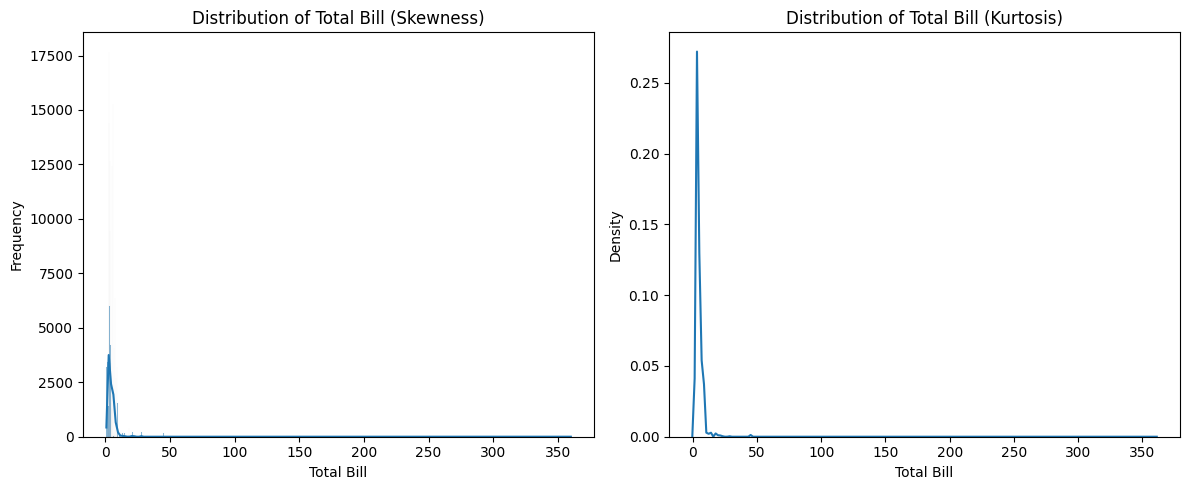

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Skewness plot
sns.histplot(df_view['total_bill'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Total Bill (Skewness)')
axes[0].set_xlabel('Total Bill')
axes[0].set_ylabel('Frequency')

# Kurtosis plot
sns.kdeplot(df_view['total_bill'], ax=axes[1])
axes[1].set_title('Distribution of Total Bill (Kurtosis)')
axes[1].set_xlabel('Total Bill')
axes[1].set_ylabel('Density')


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Unique Value

In [ ]:
df_view.nunique() # Returns the number of unique values for each column in the DataFrame

,0
transaction_id,149116
transaction_date,181
transaction_time,25762
store_id,3
store_location,3
product_id,80
transaction_qty,6
unit_price,41
total_bill,75
product_category,9


🔹`transaction_id` columns has high cardinality, it should be delete *(only for Modeling)*

In [ ]:
# # Drop the specified columns
# df_view = df_view.drop(['transaction_id'], axis=1)


## Duplicated Rows

In [ ]:
# Count the number of duplicated rows in the DataFrame:
num_duplicated_rows = df_view.duplicated().sum()  # Calculate the number of duplicated rows

# Print the count of duplicated rows:
print("Duplicated Rows:", num_duplicated_rows)  # Output the count of duplicated rows

Duplicated Rows: 0


🔹There's duplicated rows we should drop it for better analysis

In [ ]:
# Remove duplicate rows from the DataFrame
df_view.drop_duplicates(inplace=True)  # 'inplace=True' applies changes directly to df_view

In [ ]:
# Count the number of duplicated rows in the DataFrame:
num_duplicated_rows = df_view.duplicated().sum()  # Calculate the number of duplicated rows

# Print the count of duplicated rows:
print("Duplicated Rows:", num_duplicated_rows)  # Output the count of duplicated rows

Duplicated Rows: 0


# Explolatory Data Analysis

This section contains data exploration using queries, grouping, simple visualizations, and other techniques.

## Create Copy of Dataset for EDA

In [ ]:
# Create a copy of the DataFrame to avoid modifying the original data
df_eda = df_view.copy()

# Display the first 5 rows of the DataFrame:
df_eda.head()  # Show the first 5 rows to get an overview of the data

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,total_bill,product_category,product_type,product_detail,size,month_name,day_name,hour,month,day_of_week
0,114301,2023-06-01,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,2023-06-02,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,2023-06-02,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,2023-06-02,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,2023-06-03,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


## Total Sales per Month

In [ ]:
# Calculate total sales per month
monthly_sales = df_eda.groupby('month_name')['total_bill'].sum()

# Print the result
monthly_sales

,total_bill
month_name,
April,118941.08
February,76145.19
January,81677.74
June,166485.88
March,98834.68
May,156727.76


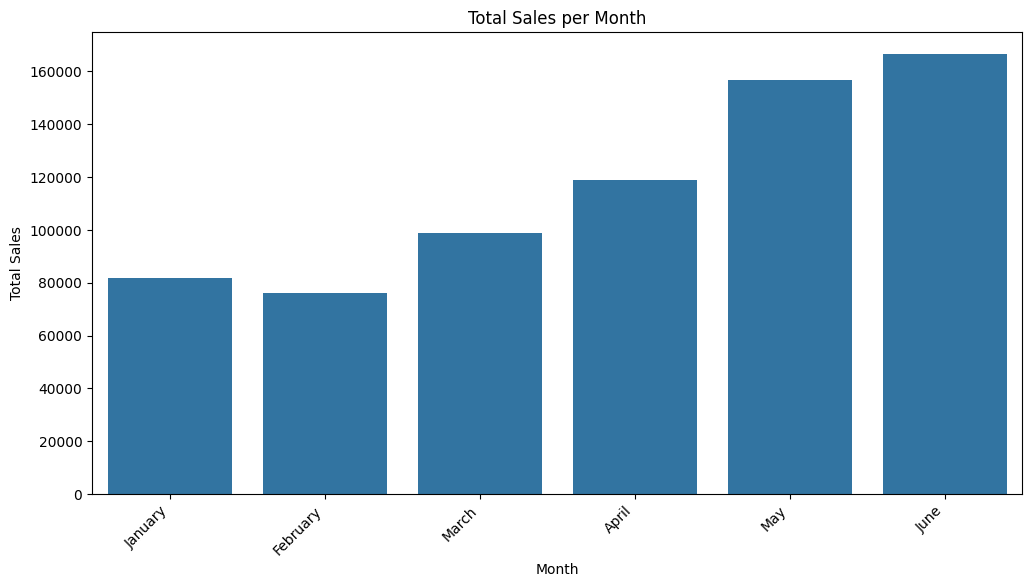

In [ ]:
# Assuming your DataFrame is named 'df_eda' and has a 'month_name' column
month_order = ['January', 'February', 'March', 'April', 'May', 'June']

# Group by 'month_name' and calculate the sum of a relevant column (e.g., total_bill)
month_sales = df_eda.groupby('month_name')['total_bill'].sum()

# Create the bar chart with the specified month order
plt.figure(figsize=(12, 6))
sns.barplot(x=month_sales.index, y=month_sales.values, order=month_order)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
plt.xticks(rotation=45, ha='right')
plt.show()

**Total Sales per Month:** The data covers a six-month period, showing varying levels of activity. Certain months appear to have higher sales, which may be influenced by seasonal factors, advertising/marketing efforts, or other external factors.

## Sales by Product Category

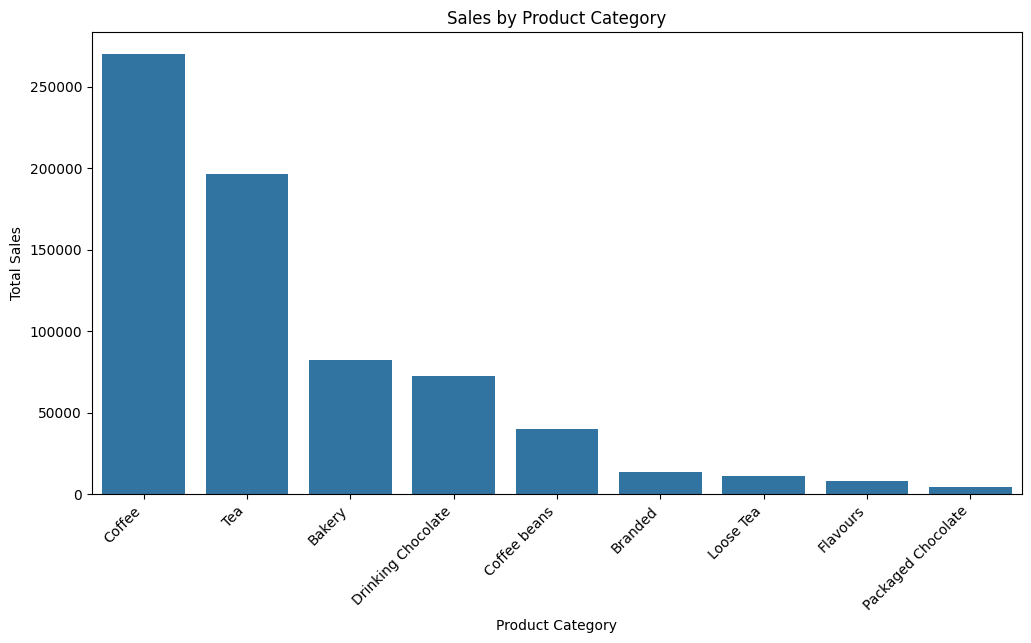

In [ ]:
# Group by 'product_category' and sum 'total_bill' to get total sales for each category
sales_by_category = df_eda.groupby('product_category')['total_bill'].sum()

# Sort the categories by total sales in descending order
sales_by_category_sorted = sales_by_category.sort_values(ascending=False)

# Create a bar chart to visualize the sales by category
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_category_sorted.index, y=sales_by_category_sorted.values)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Sales by Product Category')
plt.xticks(rotation=45, ha='right')
plt.show()

**Sales by Product Category:** Some categories are clearly more popular, indicating customer preferences or possibly a wider variety within certain categories.

## Top 10 Product Types

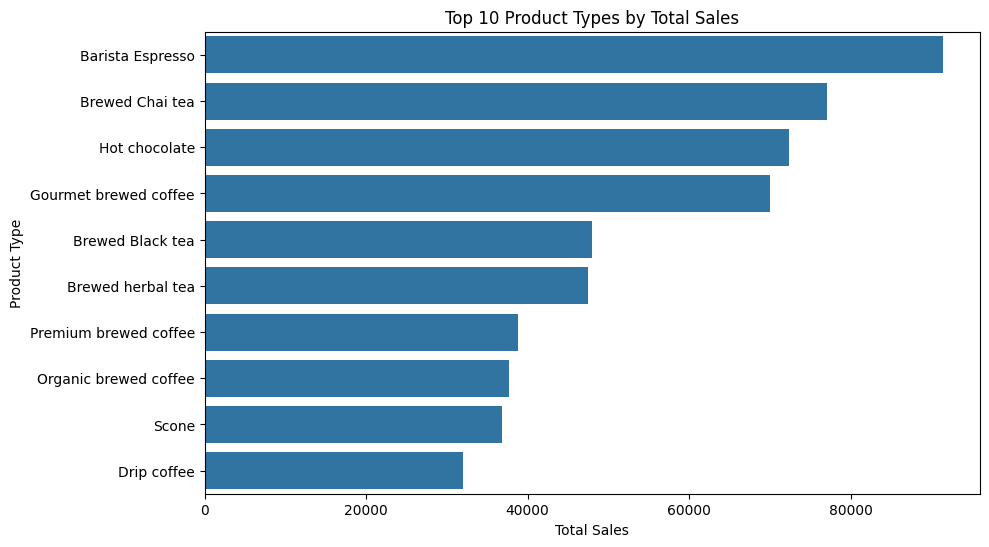

In [ ]:
# Group by 'product_type' and calculate the total sales for each product type
product_type_sales = df_eda.groupby('product_type')['total_bill'].sum()

# Sort the product types by total sales in descending order
top_10_product_types = product_type_sales.sort_values(ascending=False).head(10)

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_product_types.index, x=top_10_product_types.values, orient='h')
plt.xlabel('Total Sales')
plt.ylabel('Product Type')
plt.title('Top 10 Product Types by Total Sales')
plt.show()

**Top 10 Product Types:** This reveals specific highly popular items, which may be crucial for inventory management and marketing strategy.

## Store Analysis

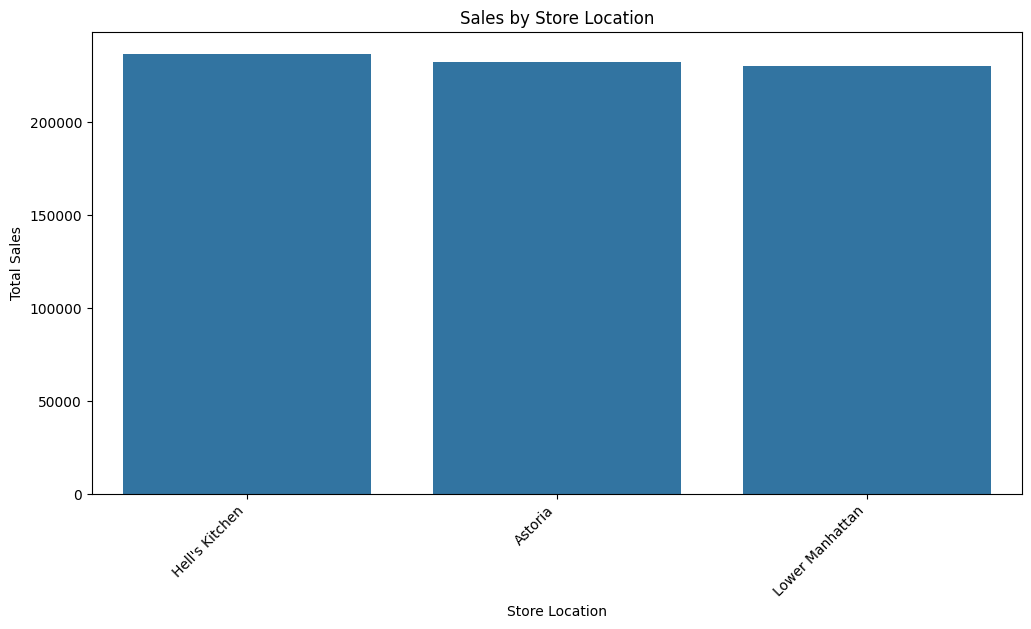

In [ ]:
# Sales by Store Location
store_location_sales = df_eda.groupby('store_location')['total_bill'].sum()

# Sort the stores by total sales in descending order
store_location_sales_sorted = store_location_sales.sort_values(ascending=False)

# Create a bar chart to visualize the sales by store location
plt.figure(figsize=(12, 6))
sns.barplot(x=store_location_sales_sorted.index, y=store_location_sales_sorted.values)
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.title('Sales by Store Location')
plt.xticks(rotation=45, ha='right')
plt.show()

Some locations have significantly higher sales volumes, which may be attributed to factors such as location popularity, size, local demographics, or accessibility.

# Business Metrics

## What is the average number of transactions per day?

In [ ]:
# Calculate the average number of transactions per day
average_daily_transactions = df_eda.groupby('transaction_date')['transaction_id'].count().mean()

print(f"The average number of transactions per day is: {average_daily_transactions:.2f}")

The average number of transactions per day is: 823.85


## Which store location has the highest average sales?

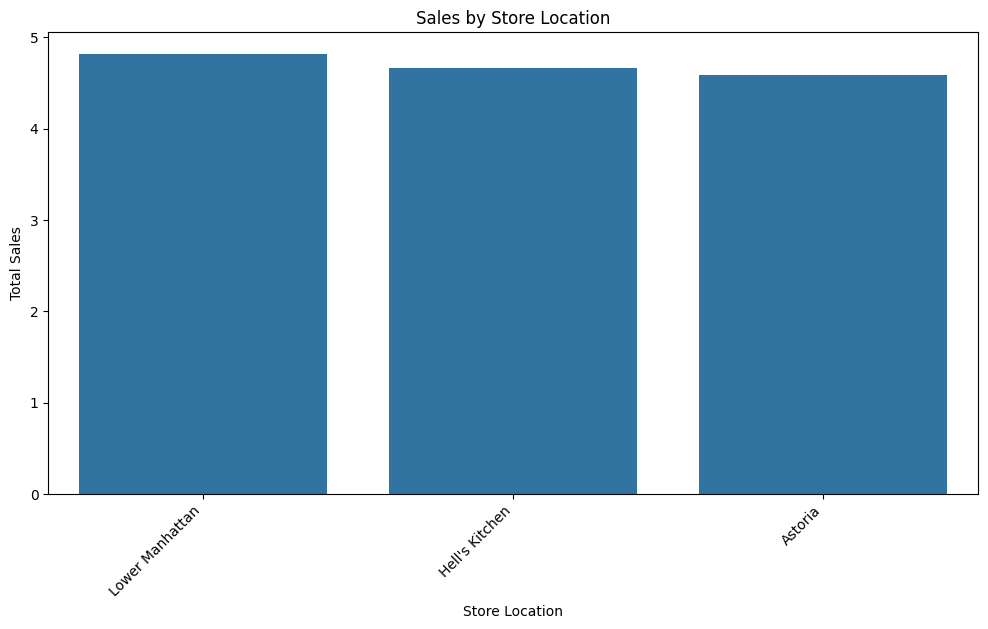

In [ ]:
# Sales by Store Location
average_sales_by_store = df_eda.groupby('store_location')['total_bill'].mean()

# Sort the stores by total sales in descending order
average_sales_by_store_sorted = average_sales_by_store.sort_values(ascending=False)

# Create a bar chart to visualize the sales by store location
plt.figure(figsize=(12, 6))
sns.barplot(x=average_sales_by_store_sorted.index, y=average_sales_by_store_sorted.values)
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.title('Sales by Store Location')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
average_sales_by_store

,total_bill
store_location,
Astoria,4.589891
Hell's Kitchen,4.661696
Lower Manhattan,4.814726


## What are the top 5 best-selling product types?

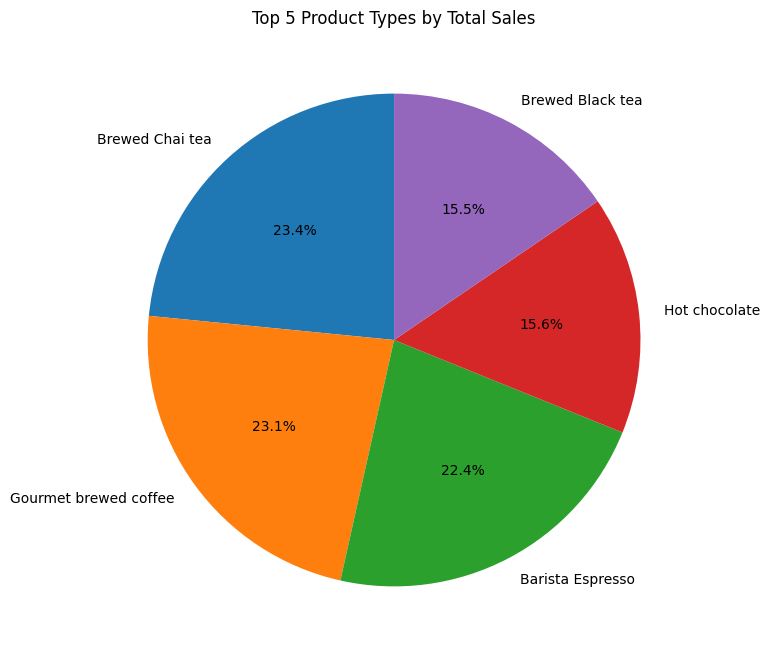

In [ ]:
# Group by 'product_type' and sum 'total_bill' to get total sales for each product type
product_type_sales = df_eda.groupby('product_type')['total_bill'].count()

# Sort the product types by total sales in descending order
top_5_product_types = product_type_sales.sort_values(ascending=False).head(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_product_types, labels=top_5_product_types.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Product Types by Total Sales')
plt.show()

In [ ]:
top_5_product_types

,total_bill
product_type,
Brewed Chai tea,17183
Gourmet brewed coffee,16912
Barista Espresso,16403
Hot chocolate,11468
Brewed Black tea,11350


## How does the average transaction value vary by product category?

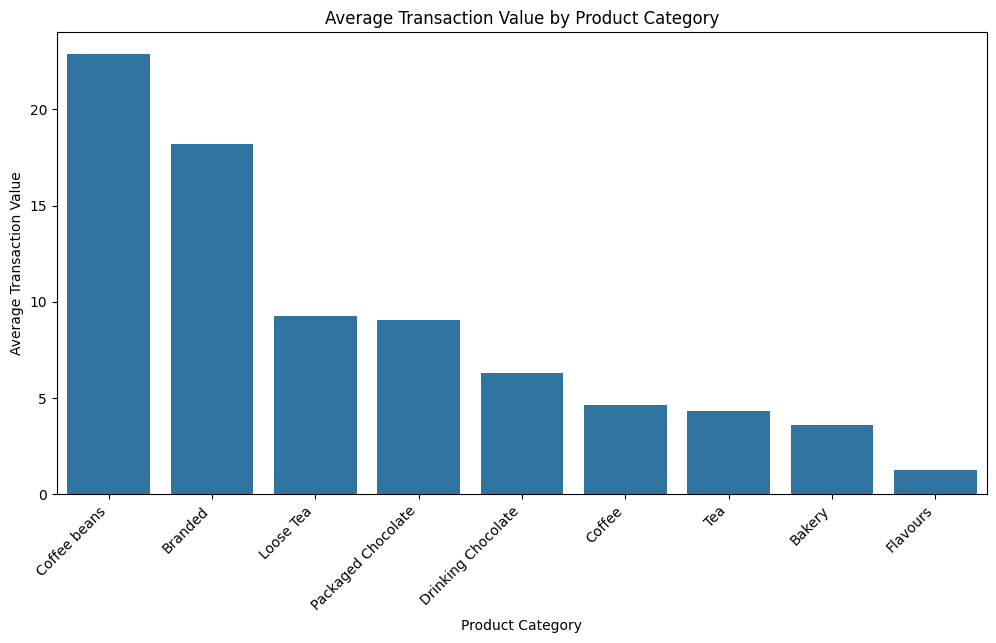

product_category
Coffee beans          22.866657
Branded               18.215529
Loose Tea              9.267438
Packaged Chocolate     9.050595
Drinking Chocolate     6.314615
Coffee                 4.621207
Tea                    4.321458
Bakery                 3.610969
Flavours               1.238409
Name: total_bill, dtype: float64


In [ ]:
# Calculate the average transaction value for each product category
average_transaction_by_category = df_eda.groupby('product_category')['total_bill'].mean()

# Sort the categories by average transaction value in descending order
average_transaction_by_category_sorted = average_transaction_by_category.sort_values(ascending=False)

# Create a bar chart to visualize the average transaction value by category
plt.figure(figsize=(12, 6))
sns.barplot(x=average_transaction_by_category_sorted.index, y=average_transaction_by_category_sorted.values)
plt.xlabel('Product Category')
plt.ylabel('Average Transaction Value')
plt.title('Average Transaction Value by Product Category')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the results (optional)
print(average_transaction_by_category_sorted)

## What is the distribution of transaction quantities?

In [ ]:
df_eda['transaction_qty'].describe()

,transaction_qty
count,149116.000000
mean,1.438276
std,0.542509
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


## What are the peak hours for sales?

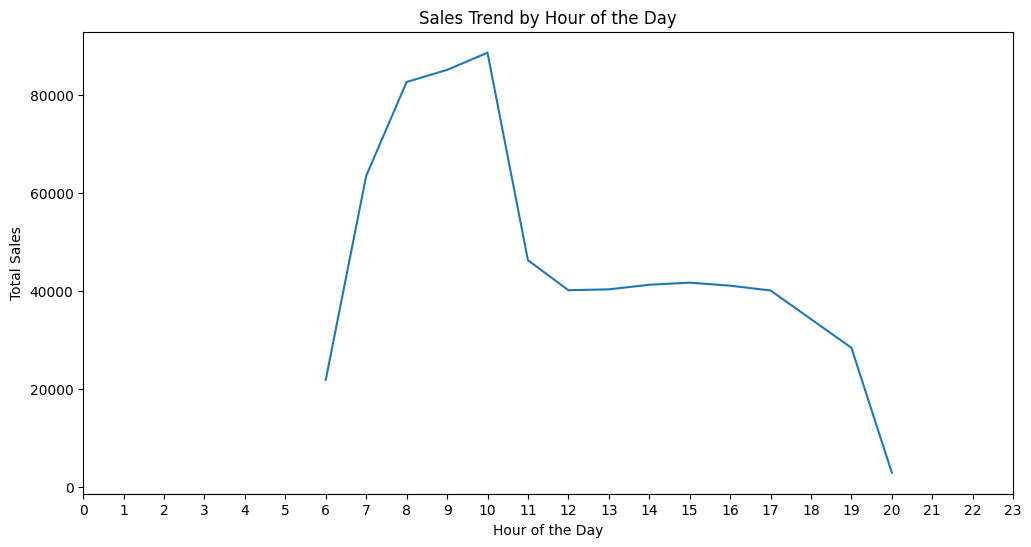

In [ ]:
# Group by 'hour' and sum 'total_bill' to get total sales for each hour
hourly_sales = df_eda.groupby('hour')['total_bill'].sum()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Sales Trend by Hour of the Day')
plt.xticks(range(0, 24))
plt.show()

In [ ]:
hourly_sales.T

,total_bill
hour,
6,21900.27
7,63526.47
8,82699.87
9,85169.53
10,88673.39
11,46319.14
12,40192.79
13,40367.45
14,41304.74


The line chart clearly shows peak sales hours, with an increase between 8 AM and 10 AM, followed by a gradual decline throughout the afternoon and evening.

## How do sales vary across days of the week?

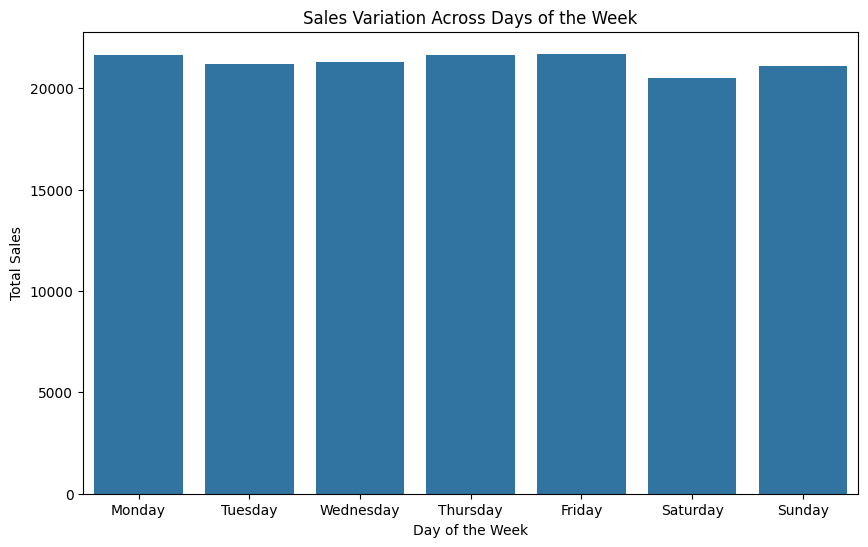

day_name
Monday       21643
Tuesday      21202
Wednesday    21310
Thursday     21654
Friday       21701
Saturday     20510
Sunday       21096
Name: total_bill, dtype: int64


In [ ]:
# Group by 'day_name' and size 'total_bill' to get total sales for each day
day_sales = df_eda.groupby('day_name')['total_bill'].size()

# Create a bar chart
plt.figure(figsize=(10, 6))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=days, y=day_sales.loc[days].values)
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Sales Variation Across Days of the Week')
plt.show()

# Print day sales starting from Monday
print(day_sales.loc[days])

------------------------------------------------------------------------

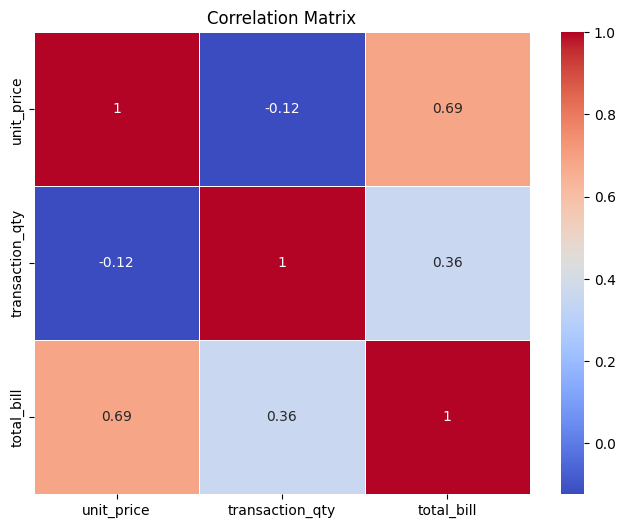

,unit_price,transaction_qty,total_bill
unit_price,1.000000,-0.123546,0.685550
transaction_qty,-0.123546,1.000000,0.356231
total_bill,0.685550,0.356231,1.000000


In [ ]:
# Correlations between unit price, transaction quantity, and total bill
correlation_data = df_eda[['unit_price', 'transaction_qty', 'total_bill']]
correlation_matrix = correlation_data.corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Answer for Q8
correlation_matrix

- There is a **moderate positive correlation (0.69)** between unit price and total bill, indicating that higher-priced items contribute significantly to the total bill.  

- The correlation between transaction quantity and total bill is **positive but weaker (0.36)**, suggesting that quantity also affects the total bill, but not as strongly as unit price.

## How is the product size distribution among the transactions?

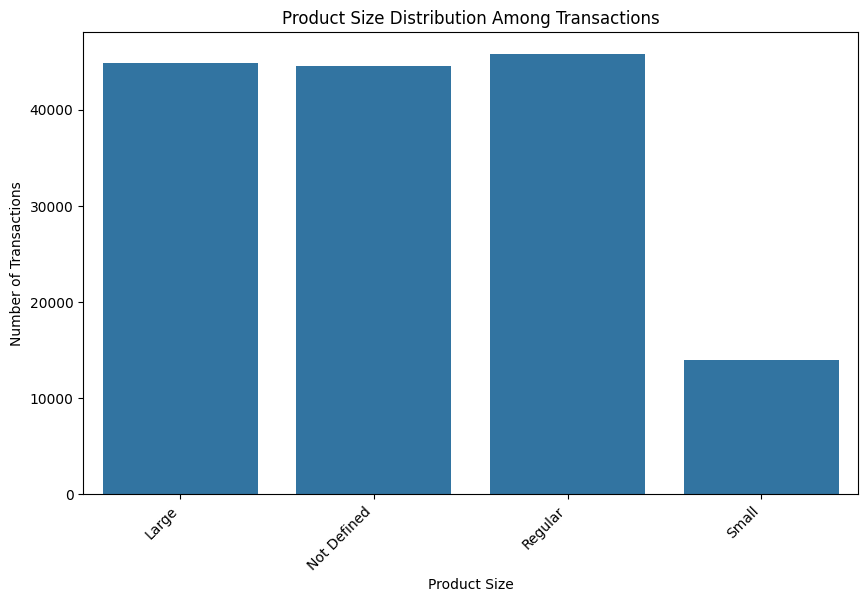

size
Large          44885
Not Defined    44518
Regular        45789
Small          13924
Name: transaction_id, dtype: int64


In [ ]:
# Group by 'size' and count the number of transactions for each size
size_distribution = df_eda.groupby('size')['transaction_id'].count()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=size_distribution.index, y=size_distribution.values)
plt.xlabel('Product Size')
plt.ylabel('Number of Transactions')
plt.title('Product Size Distribution Among Transactions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Print the size distribution (optional)
print(size_distribution)

# Conclusion

🔍 **Exploratory Data Analysis (EDA):**

📊 **Monthly Sales Trends** → Sales fluctuated, possibly due to **seasonal factors** or **marketing campaigns**.  
📦 **Sales by Product Category** → Clear differences in demand, indicating **customer preferences**.  
🏆 **Top 10 Best-Selling Products** → Identified key products for **better inventory management**.  
📍 **Sales Performance by Location** → Some stores outperformed others, suggesting **location-specific strategies**.  


📈 **Business Metrics:**  

🔢 **Daily Transactions** → The average number of transactions per day was calculated.  
🏪 **Top-Performing Store** → The location with the **highest sales** was identified.  
🔥 **Top 5 Best-Selling Products** → Useful for **stock optimization** and **marketing**.  
💰 **Transaction Value by Product Category** → Different categories showed **varying revenue contributions**.  
🛒 **Transaction Quantity Distribution** → Analyzed to **understand customer buying behavior**.  
⏰ **Peak Sales Hours** → Found key sales hours for **better staffing and resource planning**.  
📆 **Sales by Day of the Week** → Useful for **optimizing promotions and scheduling**.  
📉 **Correlation Analysis** → Explored **relationships between unit price, quantity, and total bill**.  
📏 **Product Size Distribution** → Visualized to identify **customer preferences** in sizes.  

---
 **Coffee Shop Sales Analysis: Key Insights & Recommendations**  

This analysis of coffee shop sales data uncovers **critical trends in sales performance and customer behavior**. Several **product categories and specific items consistently drive revenue**, presenting opportunities for **targeted marketing and optimized inventory management**.  

📅 **Sales fluctuate across months and weekdays**, indicating potential **seasonality** and the need for **optimized staffing** during peak hours.  
📍 **Store locations exhibit varying sales performance**, emphasizing the importance of **location-specific strategies** to maximize profitability.  
💰 **Pricing, promotions, and local demographics** may play a significant role in these trends, warranting further investigation for **data-driven decision-making**.  
📊 **Observed correlations** between **unit price, transaction quantity, and total bill** provide valuable insights for **strategic pricing adjustments**.  

By leveraging these insights, the business can implement **more effective marketing campaigns, inventory planning, and operational strategies** to enhance overall performance. 🚀  

---

# File Saving

In [ ]:
# Save df_eda DataFrame as a CSV file without the index column (for visualization purpose in other BI tools)
df_eda.to_csv('df_eda.csv', index=False)
